<a href="https://colab.research.google.com/github/prezgamer/DSA/blob/main/ML_project_Andrew.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Libraries

In [ ]:
from google.colab.patches import cv2_imshow
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('/content/Training Images/glioma/Te-gl_0025.jpg')

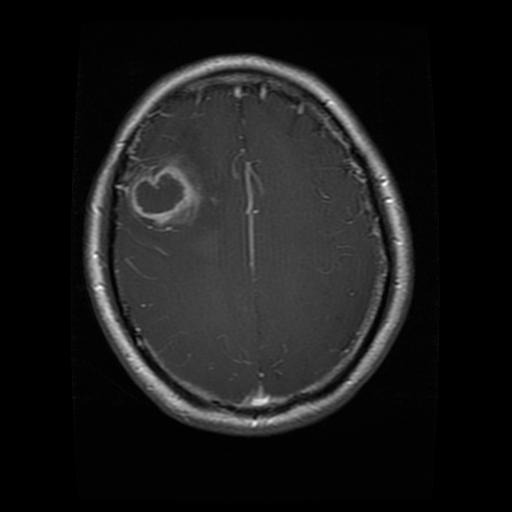

In [ ]:
cv2_imshow(image)


Median Bluring

The Median Filter is a non-linear digital filtering technique, often used to remove noise from an image or signal. Median filtering is very widely used in digital image processing because, under certain conditions, it preserves edges while removing noise. It is one of the best algorithms to remove Salt and pepper noise.

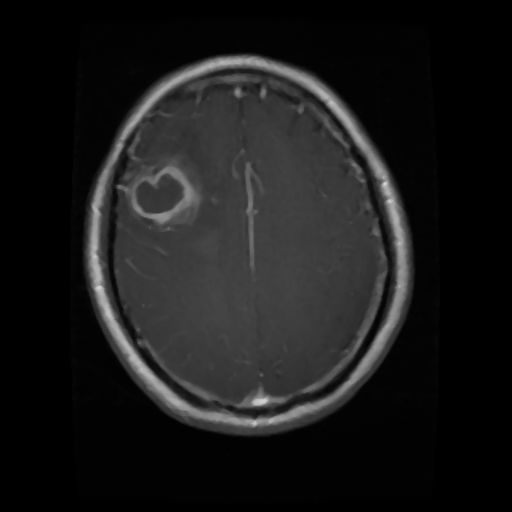

In [ ]:
median = cv2.medianBlur(image, 5)
cv2_imshow(median)

bilateral bluring

A bilateral filter is a non-linear, edge-preserving, and noise-reducing smoothing filter for images. It replaces the intensity of each pixel with a weighted average of intensity values from nearby pixels. This weight can be based on a Gaussian distribution. Thus, sharp edges are preserved while discarding the weak ones.

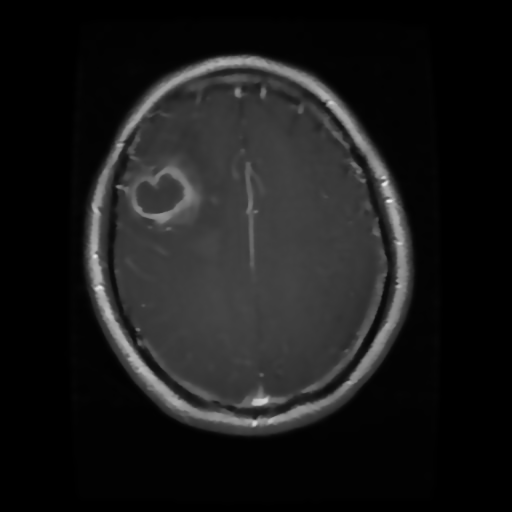

In [ ]:
bilateral = cv2.bilateralFilter(image, 9, 75, 75)
cv2_imshow(bilateral)

In [ ]:
def auto_crop_medical_image(image_path, threshold=10, padding=10):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Could not load image from {image_path}")

    # Convert to grayscale for easier processing
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Create binary mask where non-black pixels are white
    _, binary_mask = cv2.threshold(gray, threshold, 255, cv2.THRESH_BINARY)

    # Find contours to identify the main content area
    contours, _ = cv2.findContours(binary_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    if not contours:
        print("No content detected, returning original image")
        return image, (0, image.shape[0], 0, image.shape[1])

    # Get the bounding box of the largest contour (main content)
    largest_contour = max(contours, key=cv2.contourArea)
    x, y, w, h = cv2.boundingRect(largest_contour)

    # Add padding and ensure we don't go outside image boundaries
    top = max(0, y - padding)
    bottom = min(image.shape[0], y + h + padding)
    left = max(0, x - padding)
    right = min(image.shape[1], x + w + padding)

    # Crop the image
    cropped = image[top:bottom, left:right]

    return cropped, (top, bottom, left, right)

No bilateral bluring

Loading original image...
Original Image:
Size: (512, 512, 3)


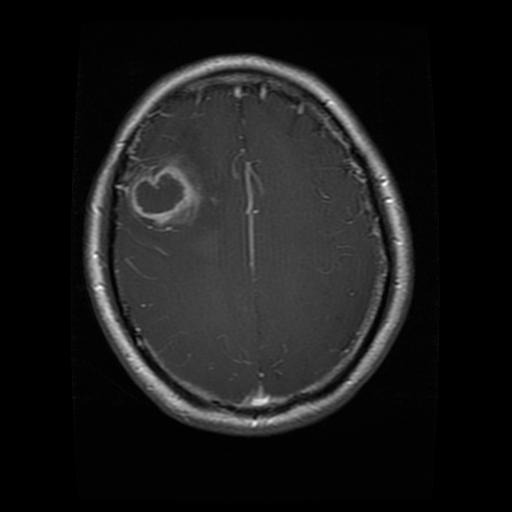


=== Method 1: Contour-based Cropping ===
Cropped size: (425, 373, 3)
Crop coordinates (top, bottom, left, right): (32, 457, 62, 435)
Cropped Image:


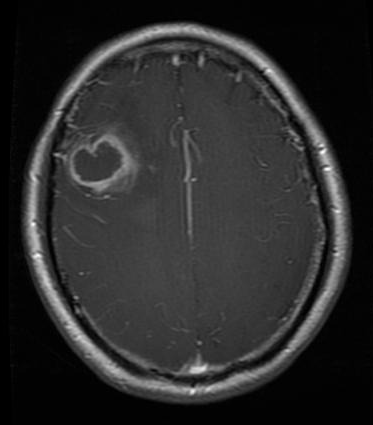

In [ ]:
image_path = '/content/Training Images/glioma/Te-gl_0025.jpg'

# Load and display original image
print("Loading original image...")
original_image = cv2.imread(image_path)

if original_image is None:
    print(f"Error: Could not load image from {image_path}")
else:
    print("Original Image:")
    print(f"Size: {original_image.shape}")
    cv2_imshow(original_image)

    # Contour-based cropping
    print("\n=== Method 1: Contour-based Cropping ===")
    cropped_image1, coords1 = auto_crop_medical_image(image_path, threshold=15, padding=20)

    print(f"Cropped size: {cropped_image1.shape}")
    print(f"Crop coordinates (top, bottom, left, right): {coords1}")
    print("Cropped Image:")
    cv2_imshow(cropped_image1)

<ipython-input-40-8f88570efbba>:4: DeprecationWarning: scipy.misc is deprecated and will be removed in 2.0.0
  from scipy import misc


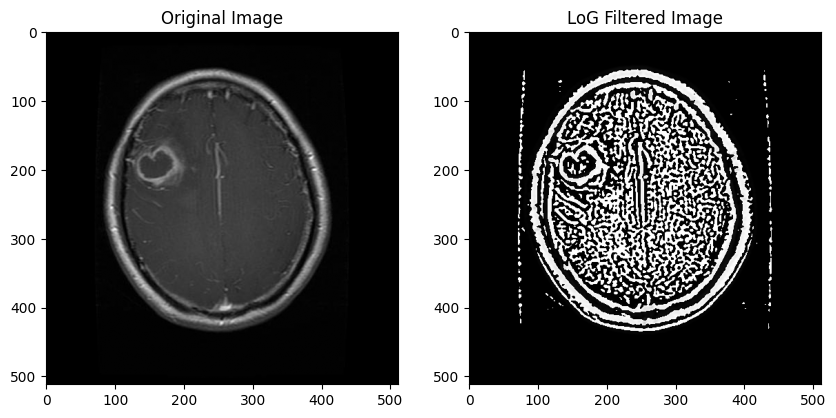

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import misc

def LoG_filter(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution
    result = convolve(image, kernel)

    return result

# Example usage:
image = cv2.imread(r"/content/Training Images/glioma/Te-gl_0025.jpg", cv2.IMREAD_GRAYSCALE)  # Replace 'path_to_your_image.png' with your image path
sigma = 2.0
filtered_image = LoG_filter(image, sigma)

# Plot the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(122)
plt.imshow(filtered_image, cmap='gray')
plt.title('LoG Filtered Image')

plt.show()

Bilteral Filtering

Bilateral Filtered Image:


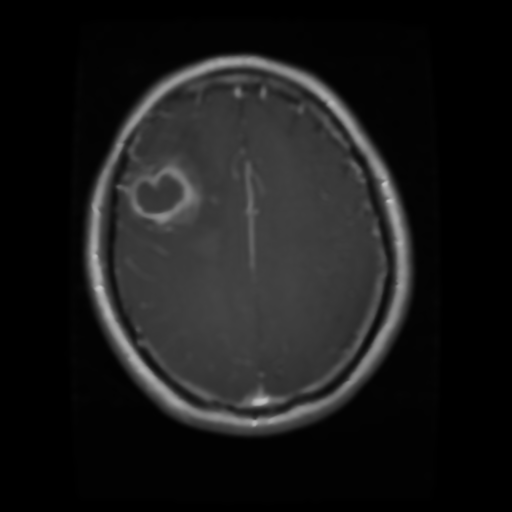

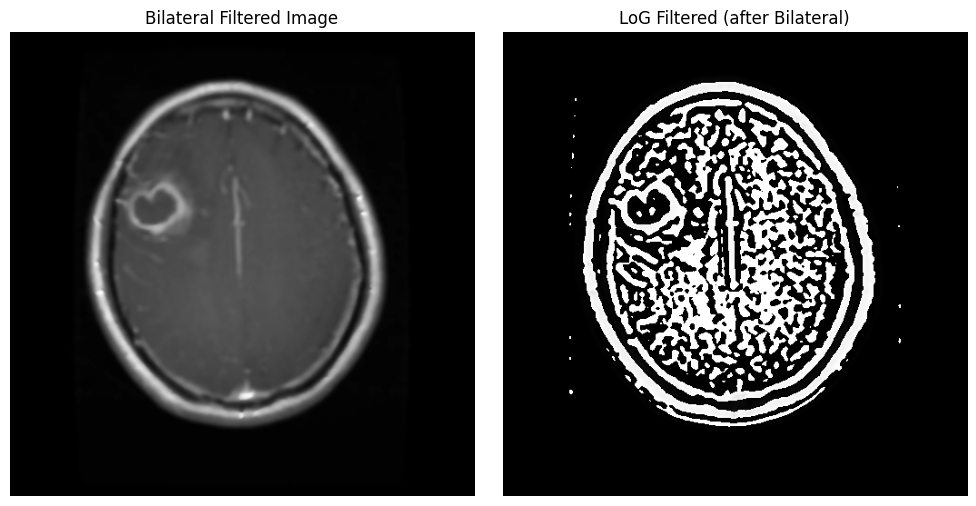

Processing completed!
Bilateral filtered image shape: (512, 512)
LoG filtered image shape: (512, 512)


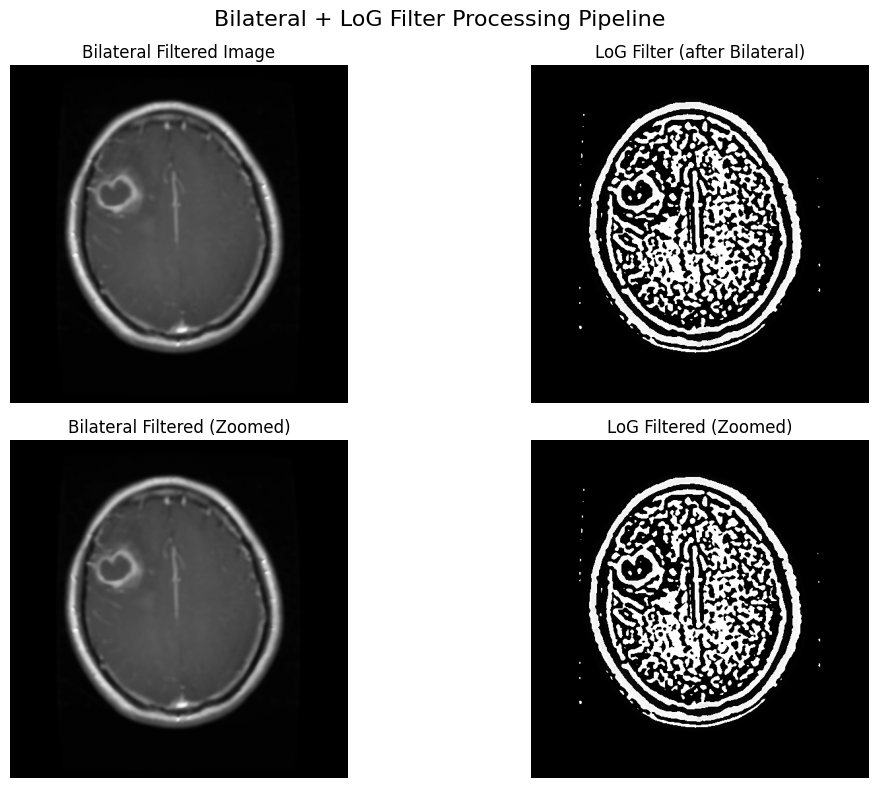

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import misc
import cv2
from google.colab.patches import cv2_imshow

def LoG_filter(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution
    result = convolve(image, kernel)

    return result

# Load the original image and convert to bilateral filtered image
image = cv2.imread(r"/content/Training Images/glioma/Te-gl_0025.jpg", cv2.IMREAD_GRAYSCALE)
bilateral = cv2.bilateralFilter(image, 9, 75, 75)

# Display the bilateral filtered image
print("Bilateral Filtered Image:")
cv2_imshow(bilateral)

# Apply LoG filter to the bilateral filtered image
sigma = 2.0
log_filtered = LoG_filter(bilateral, sigma)

# Plot comparison of bilateral filtered and LoG filtered images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(bilateral, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(log_filtered, cmap='gray')
plt.title('LoG Filtered (after Bilateral)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Processing completed!")
print(f"Bilateral filtered image shape: {bilateral.shape}")
print(f"LoG filtered image shape: {log_filtered.shape}")

# Additional visualization: Compare bilateral and LoG filtered results
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(bilateral, cmap='gray')
plt.title('Bilateral Filtered Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(log_filtered, cmap='gray')
plt.title('LoG Filter (after Bilateral)')
plt.axis('off')

plt.subplot(223)
plt.imshow(bilateral, cmap='gray')
plt.title('Bilateral Filtered (Zoomed)')
plt.axis('off')

plt.subplot(224)
plt.imshow(log_filtered, cmap='gray')
plt.title('LoG Filtered (Zoomed)')
plt.axis('off')

plt.suptitle('Bilateral + LoG Filter Processing Pipeline', fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
# Show the effect of bilateral filtering parameters on the final result
def compare_bilateral_parameters():
    """Compare different bilateral filter parameters"""

    # Different parameter combinations
    params = [
        (9, 75, 75),   # Current settings
        (15, 100, 100), # Stronger smoothing
        (5, 50, 50),   # Lighter smoothing
        (9, 150, 150)  # Very strong smoothing
    ]

    plt.figure(figsize=(16, 4))

    for i, (d, sigma_color, sigma_space) in enumerate(params):
        bilateral_test = cv2.bilateralFilter(image, d, sigma_color, sigma_space)
        log_test = LoG_filter(bilateral_test, sigma)

        plt.subplot(1, 4, i+1)
        plt.imshow(log_test, cmap='gray')
        plt.title(f'd={d}, σc={sigma_color}, σs={sigma_space}')
        plt.axis('off')

    plt.suptitle('LoG Filter Results with Different Bilateral Parameters', fontsize=14)
    plt.tight_layout()
    plt.show()


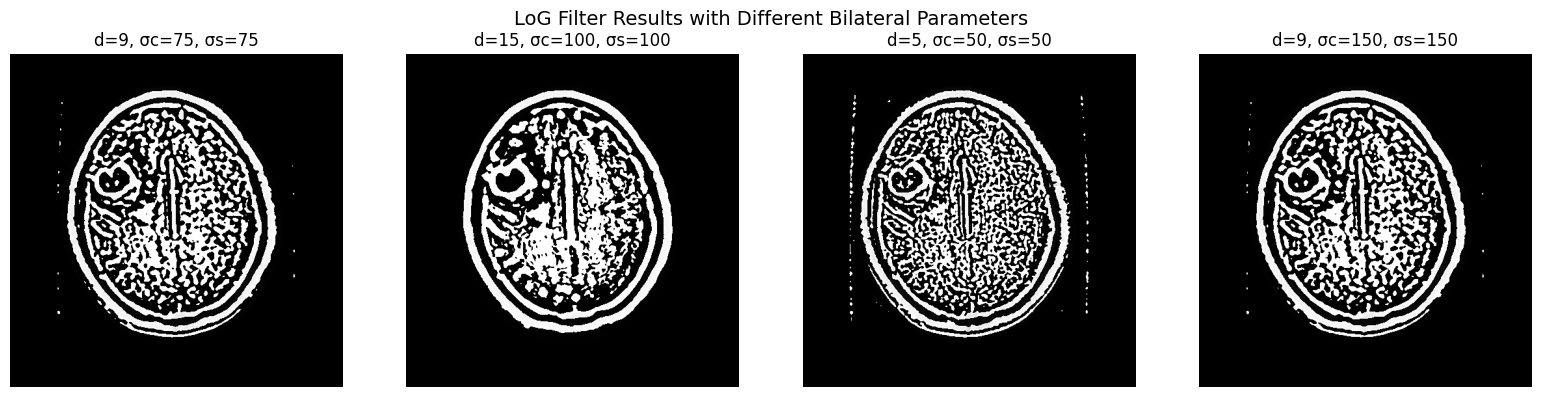

In [ ]:
compare_bilateral_parameters()

Median Filter

Median Filtered Image:


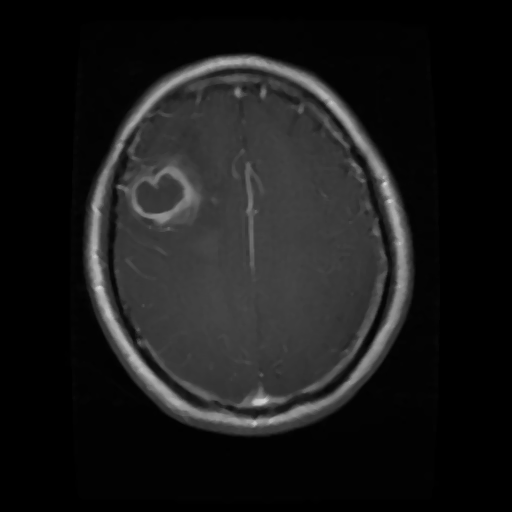

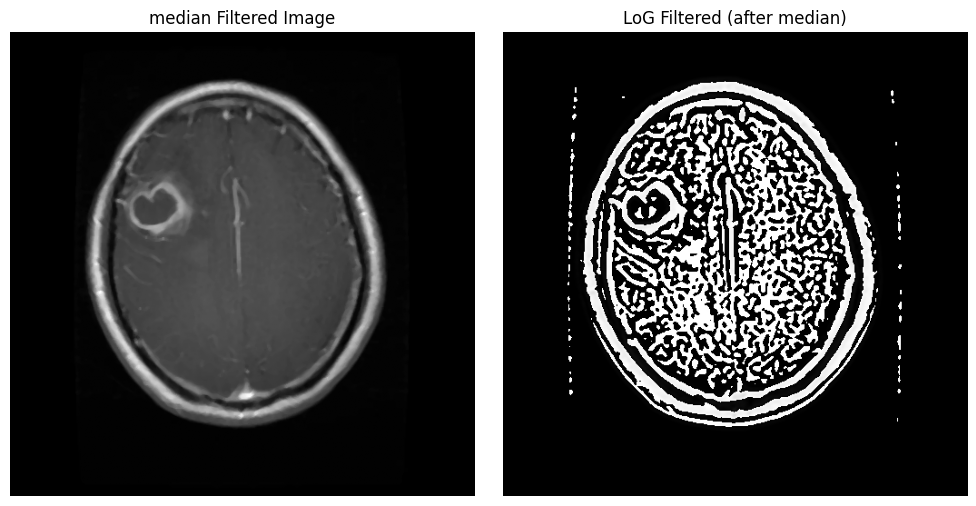

Processing completed!
median filtered image shape: (512, 512)
LoG filtered image shape: (512, 512)


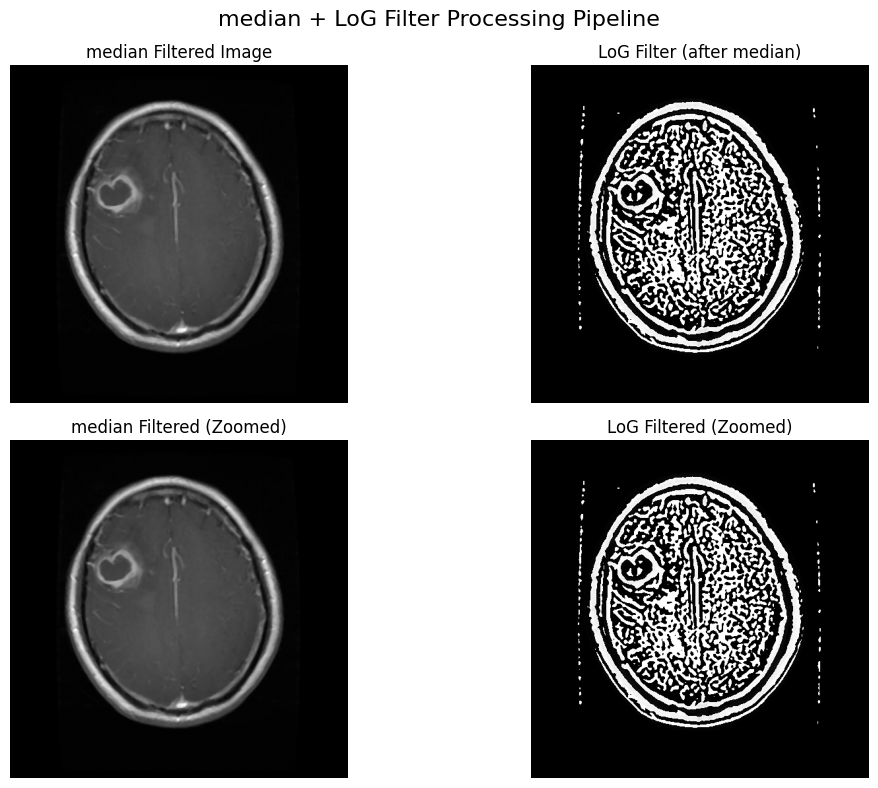

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve
from scipy import misc
import cv2
from google.colab.patches import cv2_imshow

def LoG_filter(image, sigma, size=None):
    # Generate LoG kernel
    if size is None:
        size = int(6 * sigma + 1) if sigma >= 1 else 7

    if size % 2 == 0:
        size += 1

    x, y = np.meshgrid(np.arange(-size//2+1, size//2+1), np.arange(-size//2+1, size//2+1))
    kernel = -(1/(np.pi * sigma**4)) * (1 - ((x**2 + y**2) / (2 * sigma**2))) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    kernel = kernel / np.sum(np.abs(kernel))

    # Perform convolution
    result = convolve(image, kernel)

    return result

# Load the original image and convert to bilateral filtered image
image = cv2.imread(r"/content/Training Images/glioma/Te-gl_0025.jpg", cv2.IMREAD_GRAYSCALE)
median = cv2.medianBlur(image, 5)

# Display the bilateral filtered image
print("Median Filtered Image:")
cv2_imshow(median)

# Apply LoG filter to the median filtered image
sigma = 2.0
log_filtered = LoG_filter(median, sigma)

# Plot comparison of median filtered and LoG filtered images
plt.figure(figsize=(10, 5))

plt.subplot(121)
plt.imshow(median, cmap='gray')
plt.title('median Filtered Image')
plt.axis('off')

plt.subplot(122)
plt.imshow(log_filtered, cmap='gray')
plt.title('LoG Filtered (after median)')
plt.axis('off')

plt.tight_layout()
plt.show()

print("Processing completed!")
print(f"median filtered image shape: {median.shape}")
print(f"LoG filtered image shape: {log_filtered.shape}")

# Additional visualization: Compare median and LoG filtered results
plt.figure(figsize=(12, 8))

plt.subplot(221)
plt.imshow(median, cmap='gray')
plt.title('median Filtered Image')
plt.axis('off')

plt.subplot(222)
plt.imshow(log_filtered, cmap='gray')
plt.title('LoG Filter (after median)')
plt.axis('off')

plt.subplot(223)
plt.imshow(median, cmap='gray')
plt.title('median Filtered (Zoomed)')
plt.axis('off')

plt.subplot(224)
plt.imshow(log_filtered, cmap='gray')
plt.title('LoG Filtered (Zoomed)')
plt.axis('off')

plt.suptitle('median + LoG Filter Processing Pipeline', fontsize=16)
plt.tight_layout()
plt.show()

Remove Duplicates (Need to run again after cleaning)

In [ ]:
import os
import hashlib
from collections import defaultdict

In [ ]:
def find_duplicate_images(folder_path):
    # Supported image extensions
    image_extensions = {'.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.webp'}

    # Dictionary to store hashes and their corresponding files
    hash_dict = defaultdict(list)

    print(f"Scanning folder: {folder_path}")
    print("-" * 50)

    # Walk through all files in the folder
    for root, dirs, files in os.walk(folder_path):
        for file in files:
            # Check if file has an image extension
            if os.path.splitext(file.lower())[1] in image_extensions:
                file_path = os.path.join(root, file)

                try:
                    # Calculate MD5 hash of the file
                    file_hash = get_file_hash(file_path)
                    hash_dict[file_hash].append(file_path)

                except Exception as e:
                    print(f"Error processing {file_path}: {str(e)}")

    # Filter out unique images (only keep duplicates)
    duplicates = {hash_val: paths for hash_val, paths in hash_dict.items() if len(paths) > 1}

    return duplicates

def get_file_hash(file_path):
    hash_md5 = hashlib.md5()
    with open(file_path, "rb") as f:
        for chunk in iter(lambda: f.read(4096), b""):
            hash_md5.update(chunk)
    return hash_md5.hexdigest()

def report_duplicates(duplicates):
    if not duplicates:
        print("\nNo duplicate images found!")
        return

    total_duplicates = sum(len(paths) for paths in duplicates.values())
    unique_groups = len(duplicates)

    print(f"\nFound {total_duplicates} duplicate images in {unique_groups} groups:")
    print("=" * 60)

    for i, (hash_val, paths) in enumerate(duplicates.items(), 1):
        print(f"\nDuplicate Group {i} ({len(paths)} identical files):")

        for j, path in enumerate(paths, 1):
            file_size = os.path.getsize(path)
            print(f"  {j}. {os.path.basename(path)} ({file_size:,} bytes)")
            print(f"{path}")

def remove_duplicates(duplicates):
    if not duplicates:
        print("\nNo duplicates to remove!")
        return

    removed_count = 0
    space_freed = 0

    print(f"\n🗑️  Removing duplicates (keeping first file in each group)...")
    print("=" * 60)

    for i, (hash_val, paths) in enumerate(duplicates.items(), 1):
        print(f"\nGroup {i}: Keeping '{os.path.basename(paths[0])}'")

        # Remove all files except the first one
        for path in paths[1:]:
            try:
                file_size = os.path.getsize(path)
                os.remove(path)
                print(f"  Removed: {os.path.basename(path)} ({file_size:,} bytes)")
                removed_count += 1
                space_freed += file_size
            except Exception as e:
                print(f"  Error removing {os.path.basename(path)}: {e}")

    print(f"\nCleanup complete!")
    print(f"   • Files removed: {removed_count}")
    print(f"   • Space freed: {space_freed:,} bytes ({space_freed/1024/1024:.2f} MB)")

Training Images

In [ ]:
# Set your folder path here
folder_path = "/content/Training Images/glioma/"  # Replace with your actual folder path

# Check if folder exists
if not os.path.exists(folder_path):
    print("Folder doesn't exist!")
    exit(1)

if not os.path.isdir(folder_path):
    print("Path is not a directory!")
    exit(1)

# Find and report duplicates
duplicates = find_duplicate_images(folder_path)
report_duplicates(duplicates)

# Remove duplicates if any were found
if duplicates:
    remove_duplicates(duplicates)

# Summary
if duplicates:
    total_files = sum(len(paths) for paths in duplicates.values())
    space_wasted = 0
    for paths in duplicates.values():
        # Calculate wasted space (all files except one in each group)
        file_sizes = [os.path.getsize(path) for path in paths]
        space_wasted += sum(file_sizes[1:])  # Skip the first file in each group

    print(f"\n Summary:")
    print(f"   • Total duplicate files: {total_files}")
    print(f"   • Duplicate groups: {len(duplicates)}")
    print(f"   • Wasted disk space: {space_wasted:,} bytes ({space_wasted/1024/1024:.2f} MB)")

print("\n Scan complete!")

Scanning folder: /content/Training Images/glioma/
--------------------------------------------------

No duplicate images found!

 Scan complete!


In [ ]:
# Set your folder path here
folder_path = "/content/Training Images/meningioma/"  # Replace with your actual folder path

# Check if folder exists
if not os.path.exists(folder_path):
    print("Folder doesn't exist!")
    exit(1)

if not os.path.isdir(folder_path):
    print("Path is not a directory!")
    exit(1)

# Find and report duplicates
duplicates = find_duplicate_images(folder_path)
report_duplicates(duplicates)

# Remove duplicates if any were found
if duplicates:
    remove_duplicates(duplicates)

# Summary
if duplicates:
    total_files = sum(len(paths) for paths in duplicates.values())
    space_wasted = 0
    for paths in duplicates.values():
        # Calculate wasted space (all files except one in each group)
        file_sizes = [os.path.getsize(path) for path in paths]
        space_wasted += sum(file_sizes[1:])  # Skip the first file in each group

    print(f"\n Summary:")
    print(f"   • Total duplicate files: {total_files}")
    print(f"   • Duplicate groups: {len(duplicates)}")
    print(f"   • Wasted disk space: {space_wasted:,} bytes ({space_wasted/1024/1024:.2f} MB)")

print("\n Scan complete!")

Scanning folder: /content/Training Images/meningioma/
--------------------------------------------------

No duplicate images found!

 Scan complete!


In [ ]:
# Set your folder path here
folder_path = "/content/Training Images/pituitary/"  # Replace with your actual folder path

# Check if folder exists
if not os.path.exists(folder_path):
    print("Folder doesn't exist!")
    exit(1)

if not os.path.isdir(folder_path):
    print("Path is not a directory!")
    exit(1)

# Find and report duplicates
duplicates = find_duplicate_images(folder_path)
report_duplicates(duplicates)

# Remove duplicates if any were found
if duplicates:
    remove_duplicates(duplicates)

# Summary
if duplicates:
    total_files = sum(len(paths) for paths in duplicates.values())
    space_wasted = 0
    for paths in duplicates.values():
        # Calculate wasted space (all files except one in each group)
        file_sizes = [os.path.getsize(path) for path in paths]
        space_wasted += sum(file_sizes[1:])  # Skip the first file in each group

    print(f"\n Summary:")
    print(f"   • Total duplicate files: {total_files}")
    print(f"   • Duplicate groups: {len(duplicates)}")
    print(f"   • Wasted disk space: {space_wasted:,} bytes ({space_wasted/1024/1024:.2f} MB)")

print("\n Scan complete!")

Scanning folder: /content/Training Images/pituitary/
--------------------------------------------------

No duplicate images found!

 Scan complete!


In [ ]:
# Set your folder path here
folder_path = "/content/Training Images/notumor/"  # Replace with your actual folder path

# Check if folder exists
if not os.path.exists(folder_path):
    print("Folder doesn't exist!")
    exit(1)

if not os.path.isdir(folder_path):
    print("Path is not a directory!")
    exit(1)

# Find and report duplicates
duplicates = find_duplicate_images(folder_path)
report_duplicates(duplicates)

# Remove duplicates if any were found
if duplicates:
    remove_duplicates(duplicates)

# Summary
if duplicates:
    total_files = sum(len(paths) for paths in duplicates.values())
    space_wasted = 0
    for paths in duplicates.values():
        # Calculate wasted space (all files except one in each group)
        file_sizes = [os.path.getsize(path) for path in paths]
        space_wasted += sum(file_sizes[1:])  # Skip the first file in each group

    print(f"\n Summary:")
    print(f"   • Total duplicate files: {total_files}")
    print(f"   • Duplicate groups: {len(duplicates)}")
    print(f"   • Wasted disk space: {space_wasted:,} bytes ({space_wasted/1024/1024:.2f} MB)")

print("\n Scan complete!")

Scanning folder: /content/Training Images/notumor/
--------------------------------------------------

No duplicate images found!

 Scan complete!


References:
https://medium.com/@maahip1304/the-complete-guide-to-image-preprocessing-techniques-in-python-dca30804550c